# NETFLIX DATA 

This data was downloaded from kaggle.(May, 2022)

From the description of the dataset, 

- Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

First of, lets load our data and take a look at what it consists of.

In [1]:
# import important libraries and load data 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



df=pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
# Let's try to understand the structure of what we have here

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


From the info, we can see we have over 8000 rows of data. We have about 8807 but then, not all rows are filled. We have some empty or null cells. 


In [3]:
# dropping the null rows
df1 = df.dropna()
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5332 entries, 7 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5332 non-null   object
 1   type          5332 non-null   object
 2   title         5332 non-null   object
 3   director      5332 non-null   object
 4   cast          5332 non-null   object
 5   country       5332 non-null   object
 6   date_added    5332 non-null   object
 7   release_year  5332 non-null   int64 
 8   rating        5332 non-null   object
 9   duration      5332 non-null   object
 10  listed_in     5332 non-null   object
 11  description   5332 non-null   object
dtypes: int64(1), object(11)
memory usage: 541.5+ KB


Dropping all nulls leaves us with 5332 rows of data which I think it might not be a true reflection of our data.
5332 is about 60% of the actual data. About 40% of the dataset was dropped. So lets work with the actual dataset.
We will clean the data as we move on.

In [11]:
df.describe()
#quick statistical view of our data show shows for only release year since thats the only colummn it sees as int64

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## MOVIES OR SHOWS?

From the graph below, looks like netflix has more Movies than TV shows. About 70% are Movies with the remaining Tv shows

      type  counts
0    Movie    6131
1  TV Show    2676


<AxesSubplot:title={'center':'NUMBER OF MOVIES AND SHOWS'}, ylabel='type'>

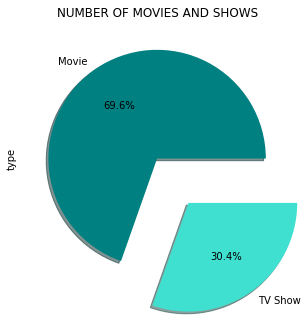

In [5]:
df_type = df['type'].value_counts().rename_axis('type').reset_index(name='counts')
print(df_type)


df['type'].value_counts().plot(kind = 'pie', figsize = (18,5), title = "NUMBER OF MOVIES AND SHOWS", autopct = '%1.1f%%', shadow =True, explode =[0,0.5], colors= ['#008080', '#40E0D0'])

## RELEASE YEAR 

2018 has had the most release from the visual followed by 2017..

<AxesSubplot:>

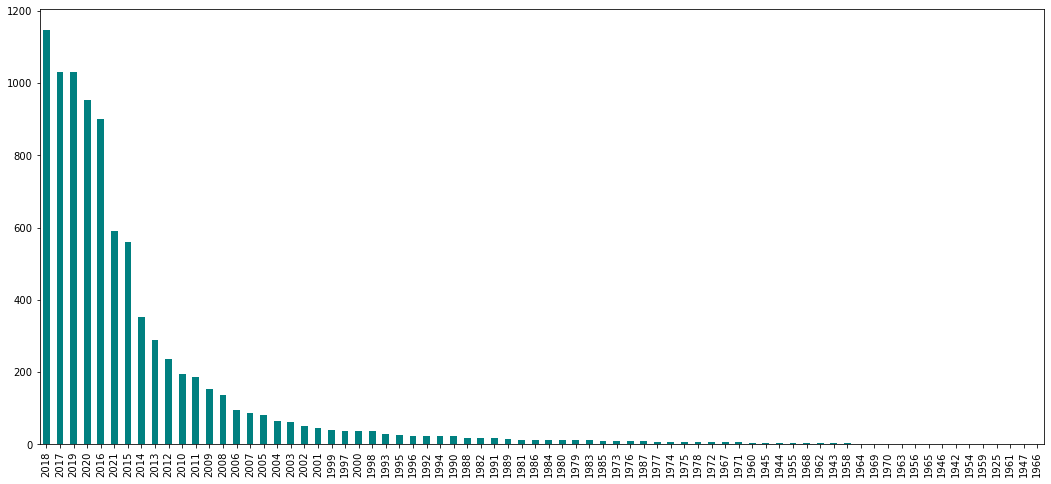

In [6]:
df['release_year'].value_counts()
color= ['#008080']
df['release_year'].value_counts().plot(kind="bar", figsize=(18,8), color = color)

## DATE ADDED

Lets see when they were added to netflix. 



<AxesSubplot:>

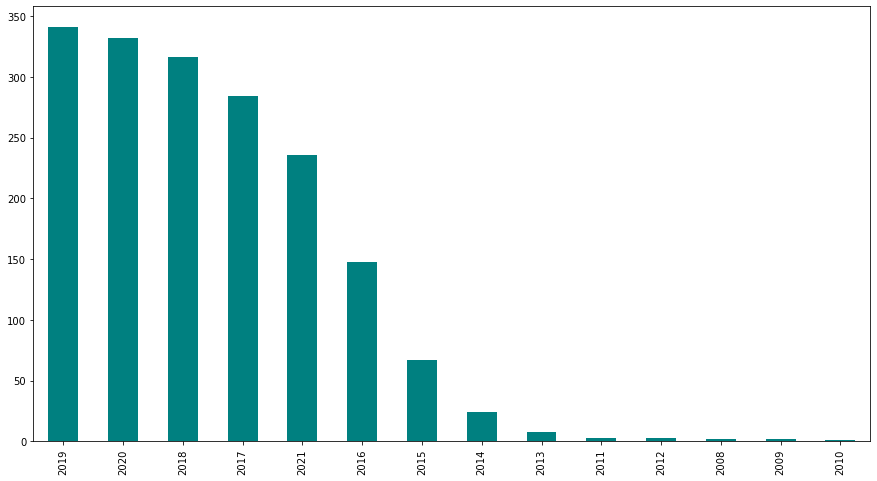

In [7]:
#dataframe to add counts as a row
df_dateadded = df['date_added'].value_counts().rename_axis('date_added').reset_index(name='counts')

#extract only year from the dates
df_dateadded['date_added'] = pd.DatetimeIndex(df_dateadded['date_added']).year

#plot count of year 
df_dateadded['date_added'].value_counts().plot(kind='bar', figsize= [15,8], color = color)

# COUNTRIES


From the pie charts and bar graphs,

US produces more Movies and Tv shows than any other country
For Movies, India is the second highest, next is UK but UK make a lot more Tv shows than India

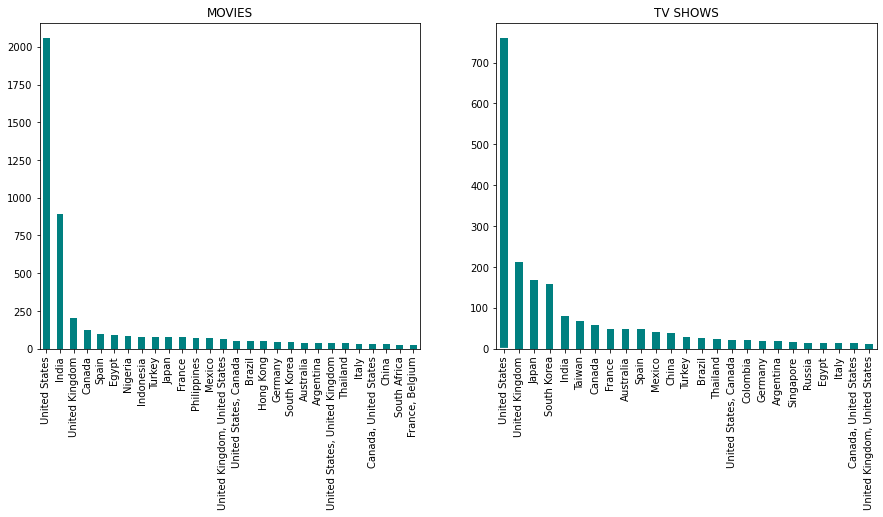

In [13]:
df5 = df.loc[: , ('type','country')]
df5["types"] = pd.Categorical(df["type"]).codes
df6 = df5.loc[(df5['type']== 'Movie')]
df8 = df5.loc[(df5['type']== 'TV Show')]
fig, axes = plt.subplots(1, 2)
df6['country'].value_counts().loc[lambda x : x> 20].plot( kind= 'bar', figsize=[15,6], ax=axes[0], title='MOVIES', color =color)
df8['country'].value_counts().loc[lambda x : x> 10].plot( kind='bar', figsize=[15,6],ax=axes[1], title='TV SHOWS', color =color)
my_circle = plt.Circle((0, 0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()